# ANALISI DEI FLUSSI MIGRATORI IN ITALIA
* * *

A tutti è noto il fenomeno della migrazione: le persone sono spinte per vari motivi a spostarsi tra Paesi, come ad esempio per lavoro, per amore o per necessità a causa di contesti di guerra, problemi climatici o politici. Il fenomeno di carattere sociale è studiato da numerosi sociologi e politologi; ne risulta che è molto controverso e sostenuto e/o criticato (a seconda dei punti di vista); in Italia è un argomento che suscita non poche polemiche, soprattutto a livello politico.

**OBBIETTIVO**: la seguente analisi ha come obbiettivo quello di evidenziare la presenza di fenomeni migratori verso il nostro Paese mettendone in luce i *numeri*, i *motivi* e le *conseguenze* che possono derivarne.

**I DATI**: la fonte dei dati è l'ISTAT, che si occupa, tramite una sezione dedicata (Immigrati.Stat), di raccogliere numeri a proposito del fenomeno nelle sue varie sfaccettature.

+ **Importo le librerie**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

+ **PUNTO 1: NUMERO MIGRANTI RESIDENTI IN ITALIA nei recenti anni**

**QUANTI SONO? SONO IN AUMENTO?**

Per prima cosa importo il dataframe della popolazione straniera residente in italia suddivisa per anni (2017, 2018, 2019), sesso e regione. Si utilizzano gli ultimi tre anni resi disponibili dall'ISTAT per semplicità e come punto di riferimento.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [3]:
residenti_totale = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_residenti.csv", usecols=['Territorio', 'Tipo di indicatore demografico', 'Sesso', 'Seleziona periodo', 'Value'])
residenti_totale.isnull().any() #non sono presenti valori nulli

Territorio                        False
Tipo di indicatore demografico    False
Sesso                             False
Seleziona periodo                 False
Value                             False
dtype: bool

Visualizzo la tabella dei residenti rinominando le colonne per semplicità.

In [4]:
residenti_totale = residenti_totale.rename(columns= {'Tipo di indicatore demografico' : 'index', 'Seleziona periodo' : 'periodo', 'Value':'valore'})
residenti_totale

,Territorio,index,Sesso,periodo,valore
0,Italia,popolazione straniera al 1° gennaio,maschi,2017,2404129
1,Italia,popolazione straniera al 1° gennaio,maschi,2018,2471722
2,Italia,popolazione straniera al 1° gennaio,maschi,2019,2540471
3,Italia,nati vivi stranieri,maschi,2017,34883
4,Italia,nati vivi stranieri,maschi,2018,33671
...,...,...,...,...,...
28939,Sud Sardegna,stranieri cancellati in anagrafe per l'estero,totale,2018,121
28940,Sud Sardegna,stranieri cancellati in anagrafe per l'estero,totale,2019,163
28941,Sud Sardegna,popolazione straniera residente in famiglia,totale,2017,5858
28942,Sud Sardegna,popolazione straniera residente in famiglia,totale,2018,5811


Successivamente seleziono le righe contentente il numero totale di popolazione residente al 31 dicembre e creo un dataframe per ogni anno.

In [3]:
residenti = residenti_totale.loc[(residenti_totale['index']== 'popolazione straniera al 31 dicembre')]
residenti = residenti.loc[(residenti['Territorio'] == 'Italia')]
residenti = residenti.loc[(residenti['Sesso']== 'totale')]
residenti

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


In [4]:
residenti_2017 = residenti.iloc[0:1]
residenti_2017.head()

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440


In [5]:
residenti_2018 = residenti.iloc[1:-1]
residenti_2018.head()

,Territorio,index,Sesso,periodo,valore
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503


In [6]:
residenti_2019 = residenti.iloc[2:]
residenti_2019.head()

,Territorio,index,Sesso,periodo,valore
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


#### Visioniamo la variazione di persone straniere residenti in Italia dal 2017 al 2019. Nel 2017 la popolazione straniera residente era pari a 5144440, nel 2018 era 5255503 e nel 2019 era 5306548. Il numero è in leggero aumento ma non in modo significativo.

Vogliamo visualizzare graficamente questo leggero aumento.

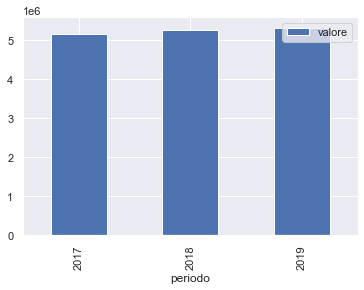

In [7]:
residenti.plot(x='periodo', y='valore', kind='bar')

+ **PUNTO 2: PER QUALI MOTIVI LE PERSONE MIGRANO IN ITALIA esempio 2018**

L'ISTAT fornisce annualmente i dati sui permessi di soggiorno; viene utilizzato il dataframe del 2018 come esempio più recente. Il permesso di soggiorno è utile in quanto mi consente di estrapolare i motivi per i quali i richiedenti si trovano in Italia.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [18]:
permesso_sogg = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/permesso_soggiorno.csv", usecols=['Sesso','Principali Paesi di cittadinanza', 'Motivo del permesso', 'Seleziona periodo', 'Value'])
permesso_sogg.isnull().any() #non sono presenti valori nulli

Sesso                               False
Principali Paesi di cittadinanza    False
Motivo del permesso                 False
Seleziona periodo                   False
Value                               False
dtype: bool

Visualizzo il dataframe rinominando per comodità le variabili.

In [22]:
permesso_sogg = permesso_sogg.rename(columns= {'Principali Paesi di cittadinanza' : 'paese_cittadinanza', 'Motivo del permesso' : 'motivo_permesso', 'Seleziona periodo':'periodo', 'Value' : 'valore'})
permesso_sogg

,Sesso,paese_cittadinanza,motivo_permesso,periodo,valore
0,maschi,Albania,lavoro,2018,1384
1,maschi,Albania,famiglia,2018,6964
2,maschi,Albania,studio,2018,205
3,maschi,Albania,"asilo, richiesta asilo e motivi umanitari",2018,426
4,maschi,Albania,"residenza elettiva, religione, salute",2018,2570
...,...,...,...,...,...
34907,femmine,Serbia/Kosovo/Montenegro,"asilo, richiesta asilo e motivi umanitari",2018,2
34908,maschi,Serbia/Kosovo/Montenegro,"residenza elettiva, religione, salute",2018,1
34909,femmine,Serbia/Kosovo/Montenegro,studio,2018,3
34910,femmine,Serbia/Kosovo/Montenegro,"residenza elettiva, religione, salute",2018,1


Con la funzione pivot_table() creo una tabella coerente e ordinata nel quale visualizzo i valori per tipologia di permesso e suddivisi per provenienza geografica.

In [23]:
permesso_sogg1 = permesso_sogg.pivot_table(values='valore', index='paese_cittadinanza', columns='motivo_permesso')
permesso_sogg1

motivo_permesso,"asilo, richiesta asilo e motivi umanitari",famiglia,lavoro,"residenza elettiva, religione, salute",studio,tutte le voci
paese_cittadinanza,,,,,,
Albania,18.503704,329.503876,43.738854,103.892761,17.924370,484.056266
Altri paesi,512.096939,432.590331,59.165746,88.365979,187.774278,1267.165394
Bangladesh,184.975610,145.247813,3.757009,12.022727,3.690141,280.339523
Brasile,6.086957,68.654545,8.957895,27.097179,23.446970,112.328205
Cina,14.647059,118.894737,20.452489,14.896907,127.212544,235.989637
Egitto,19.926606,167.866279,15.434555,16.793478,14.875000,191.597826
Filippine,4.941176,77.339450,8.392857,15.478261,5.065217,88.708333
Ghana,62.112853,38.443686,2.929577,5.248000,13.833333,95.858757
India,18.218009,170.374332,72.244224,20.382979,64.615385,284.062338


#### Dalla tabella è possibile constatare come siano numerosi i Paesi dal quale provengano gli stranieri. Inoltre, i motivi riportati dall'ISTAT sono asilo, richiesta asilo e motivi umanitari, lavoro, famiglia, studio, residenza elettiva, religione e salute. Guardando la tabella ad occhio è possibile denotare come uno dei motivi principali sia la famiglia.

Per entrare nel merito visualizziamo graficamente la distribuzione secondo il motivo.

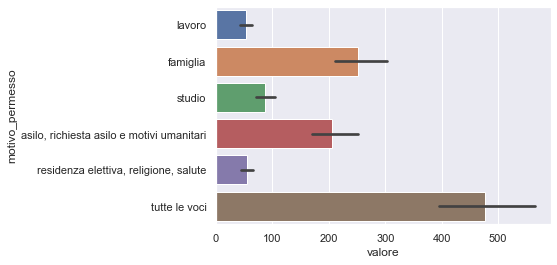

In [29]:
sns.set_style(style="darkgrid")
sns.color_palette("husl", 9)
sns.barplot(data=permesso_sogg, x='valore', y='motivo_permesso', orient='h')

#### I motivi principali sono appunto la famgilia e asilo, richiesta asilo e motivi umanitari. Nel primo caso rientrano le casistiche di soggetti aventi parenti nel nostro territorio; nel secondo caso rientrano persone provenienti da Paesi con probabili difficoltà politiche e di stabilità, ove i soggetti non godono di ampi diritti umani.

In questa analisi non spiccano le motivazioni di carattere economico, quindi migrazioni per il lavoro. Me ne occupo nel prossimo punto.

+ **PUNTO 3: OCCUPAZIONE E DISOCCUPAZIONE DEGLI STRANIERI IN ITALIA**

**CHE PERCENTUALE C'E' DI OCCUPAZIONE? E DI DISOCCUPAZIONE? IN CHE COSA SONO GENERALMENTE OCCUPATI?**

1)  **_OCCUPAZIONE_**: analizziamo i tassi di occupazione del 2019 (sono quelli proposti) della popolazione straniera in Italia con suddivsione nel territorio e secondo il titolo di studio.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [39]:
occupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_occup.csv", usecols=['Sesso', 'Territorio', 'Cittadinanza', 'Titolo di studio', 'Seleziona periodo', 'Value'])
occupati.isnull().any() #non ci sono valori nulli

Territorio           False
Sesso                False
Titolo di studio     False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

In [40]:
occupati = occupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
occupati

,Territorio,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
0,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,70.132598
1,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T1-2019,66.645359
2,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T2-2019,69.608896
3,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T4-2019,69.782218
4,Italia,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T3-2019,74.749894
...,...,...,...,...,...,...
385,Mezzogiorno,totale,laurea e post-laurea,straniero-a,T2-2019,53.083763
386,Mezzogiorno,totale,laurea e post-laurea,straniero-a,T4-2019,48.177114
387,Mezzogiorno,totale,laurea e post-laurea,straniero-a,T3-2019,63.885869
388,Mezzogiorno,totale,laurea e post-laurea,straniero-a,T2-2020,54.683002


Estrapoliamo dalla tabella solo i dati complessivi del 2019, attraverso l'indicizzazione secondo il periodo e una maschera.

In [45]:
occupati.set_index('periodo')
occupati_2019 = occupati.loc[(occupati['periodo']=='2019') & (occupati['Sesso']=='totale')]
occupati_2019

,Territorio,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
70,Italia,totale,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,55.341809
77,Italia,totale,licenza di scuola media,straniero-a,2019,57.311169
84,Italia,totale,diploma,straniero-a,2019,65.442083
91,Italia,totale,laurea e post-laurea,straniero-a,2019,67.419553
98,Italia,totale,totale,straniero-a,2019,60.995518
127,Nord,totale,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,50.866395
134,Nord,totale,licenza di scuola media,straniero-a,2019,58.265311
141,Nord,totale,diploma,straniero-a,2019,69.765183
148,Nord,totale,laurea e post-laurea,straniero-a,2019,69.166192
155,Nord,totale,totale,straniero-a,2019,63.122507


Raggruppando secondo il titolo di studio vediamo la percentuale media di occupazione degli stranieri in Italia.

In [47]:
occupati1 = occupati.groupby('titolo_di_studio')
occupati1.mean()

,valore
titolo_di_studio,
diploma,64.782263
laurea e post-laurea,66.532000
"licenza di scuola elementare, nessun titolo di studio",51.786082
licenza di scuola media,56.375118
totale,60.324838


#### Come possiamo notare dal risultato il tasso di occupazione è più alto per quei soggetti che hanno conseguito una laurea e/o un post-laurea pari al 66.53%, ma non di molto si discosta la percentuale di occupati dopo il diploma pari a 64.78%. Logicamente più bassa è la percentuale di coloro che non hanno nessun titolo di studio o hanno la licenza di scuola elementare, pari al 51.78%.

Visioniamo per capie meglio, il tasso di occupazione sulla base del proprio titolo di studio attraverso un grafico.

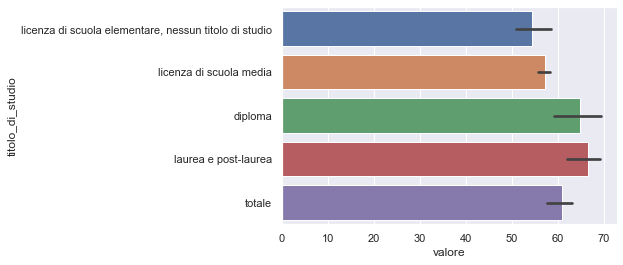

In [51]:
sns.barplot(data=occupati_2019, x='valore', y='titolo_di_studio', orient='h')

#### Nel complesso possiamo affermare che il tasso di occupazione è abbastanza alto tra la popolazione straniera (circa 6 persone su 10). Sicuramente si deve sottolineare il fatto che molti soggetti in diffoltà accettano anche lavori nell'economia sommersa, che quindi non compaiono in queste statistiche.

Sorge spontaneo però domandarsi quanti stranieri abbiano la possibilità di proseguire gli studi, sia in termini economici che di tempo. Analizziamo il numero di soggetti stranieri iscritti all'università.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [54]:
universita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_uni.csv", usecols=['AnnoA', 'AteneoNOME', 'CorsoTIPO', 'Continente', 'CittadinanzaNOME', 'Isc_S'])
universita.isnull().any() #non ci sono valori nulli

AnnoA               False
AteneoNOME          False
CorsoTIPO           False
Continente          False
CittadinanzaNOME    False
Isc_S               False
dtype: bool

Organizzo il dataframe con nomi di colonne più conformi e semplici.

In [55]:
universita = universita.rename(columns= {'AnnoA' : 'anno', 'AteneoNOME' : 'ateneo', 'CorsoTIPO' : 'tipo_corso', 'CittadinanzaNOME' : 'cittadinanza', 'Isc_S': 'valore'})
universita

,anno,ateneo,tipo_corso,Continente,cittadinanza,valore
0,2018/2019,Torino,Laurea,EUROPA-UE,Romania,983
1,2018/2019,Roma La Sapienza,Laurea,EUROPA-UE,Romania,945
2,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Cina,916
3,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,India,771
4,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Iran,717
...,...,...,...,...,...,...
1495,2018/2019,Genova,Laurea,SUD AMERICA,Bolivia,10
1496,2018/2019,Brescia,Laurea Magistrale,EUROPA,Moldavia,10
1497,2018/2019,Bergamo,Laurea Magistrale,SUD AMERICA,Bolivia,10
1498,2018/2019,Milano Bicocca,Laurea Magistrale Ciclo Unico,ASIA,Iran,10


In [57]:
universita1 = universita.groupby('tipo_corso')
universita1.sum()

,valore
tipo_corso,
Laurea,40030
Laurea Magistrale,20994
Laurea Magistrale Ciclo Unico,6904
Vecchio Ordinamento,31


#### I numeri a livello nazionale non sono altissimi, ma nemmeno non significativi. In Italia l'università è per molte persone un investimento troppo elevato economicamente, quindi in primis le persone straniere potrebbero incontrare questo grande ostacolo. Ritornando alle percentuali di occupazione, si verifica il c.d. effetto selezione per cui gli stranieri che riescono a superare l'ostacolo hanno garantito un buon livello occupazionale.

2) **_DISOCCUPAZIONE_**: visioniamo i tassi di disocupazione analogamente al punto precedente.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [60]:
disoccupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_disoccup.csv", usecols=['Sesso', 'Titolo di studio', 'Cittadinanza', 'Seleziona periodo', 'Value'])
disoccupati.isnull().any() #non ci sono valori nulli

Sesso                False
Titolo di studio     False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Proseguiamo con l'analisi dei tassi e per prima cosa modifichiamo il nome delle variabili.

In [62]:
disoccupati = disoccupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
disoccupati

,Sesso,titolo_di_studio,Cittadinanza,periodo,valore
0,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,2019,14.237611
1,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T1-2019,17.925378
2,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T2-2019,14.756560
3,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T4-2019,14.365419
4,maschi,"licenza di scuola elementare, nessun titolo di...",straniero-a,T3-2019,9.799707
...,...,...,...,...,...
205,totale,totale,straniero-a,T2-2019,14.289548
206,totale,totale,straniero-a,T4-2019,13.796039
207,totale,totale,straniero-a,T3-2019,12.241934
208,totale,totale,straniero-a,T2-2020,10.069965


Raggruppiamo i dati per il titolo di studio e visualizziamo la percentuale media di disoccupati.

In [65]:
disoccupati1= disoccupati.groupby('titolo_di_studio')
disoccupati1.mean()

,valore
titolo_di_studio,
diploma,13.514178
laurea e post-laurea,10.438963
"licenza di scuola elementare, nessun titolo di studio",15.602786
licenza di scuola media,13.555965
totale,13.384252


#### I tassi di disoccupazione sono generalmente molto bassi, il 10% per i laureati ed il 15% anche per i soggetti senza titolo di studio o con la licenza di scuola elementare sono disoccupati. Da questi risultati si può desumere il fatto che gli stranieri nel nostro Paese facciano parte della forza lavoro e che una piccola parte di essi non lavorano. Anche per questi dati si può riflettere sul fatto che parte dei soggetti risultati disoccupati possano fare parte dell'economia sommersa.

Anche in questo caso analizziamo i tassi in base al titolo di studio conseguito graficamente.

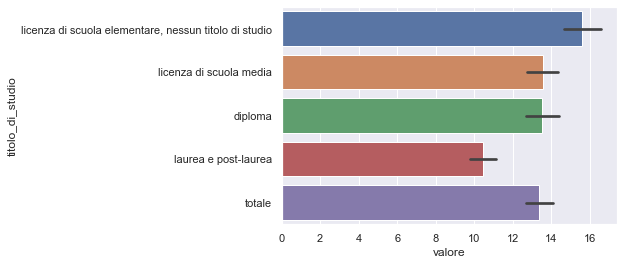

In [66]:
sns.barplot(data=disoccupati, x='valore', y='titolo_di_studio', orient='h')

Non ci siamo però occupati della tipologia di attivtà che quest'ultimi svolgono, molto utili ai fini dell'analisi.

3) **_TIPOLOGIA DI ATTIVITA' SVOLTA_**: analizziamo che attività svolgono gli stranieri in Italia.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [70]:
tipo_occup = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/occupaz_str.csv", usecols=['Territorio', 'Sesso', 'Professione 2011', 'Seleziona periodo', 'Value'])
tipo_occup.isnull().any() #non ci sono valori nulli

Territorio           False
Sesso                False
Professione 2011     False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo per semplicità le variabili.

In [71]:
tipo_occup = tipo_occup.rename(columns={'Professione 2011' : 'Professione', 'Seleziona periodo': 'periodo', 'Value' : 'valore'})
tipo_occup

,Territorio,Sesso,Professione,periodo,valore
0,Italia,maschi,qualificate e tecniche,2019,92.588
1,Italia,maschi,qualificate e tecniche,T1-2019,83.485
2,Italia,maschi,qualificate e tecniche,T2-2019,84.787
3,Italia,maschi,qualificate e tecniche,T4-2019,101.517
4,Italia,maschi,qualificate e tecniche,T3-2019,100.564
...,...,...,...,...,...
265,Nord-ovest,maschi,totale,T1-2020,470.155
266,Mezzogiorno,maschi,qualificate e tecniche,2019,6.655
267,Mezzogiorno,maschi,impiegati e addetti al commercio e servizi,2019,35.698
268,Mezzogiorno,maschi,personale non qualificato,2019,113.659


Sarebbe interessante andare a vedere come le diverse professioni si distribuiscono sul territorio italiano.

In [76]:
tipo_occup1 = tipo_occup.pivot_table(values='valore', index='Territorio', columns='Professione')
tipo_occup1

Professione,impiegati e addetti al commercio e servizi,operari e artigiani,personale non qualificato,qualificate e tecniche,totale
Territorio,,,,,
Centro,131.381333,122.874000,149.838667,33.454000,429.226095
Italia,466.276095,504.135286,539.900810,125.793667,1636.105810
Mezzogiorno,74.169333,49.988667,122.121333,9.185667,245.488333
Nord,280.674667,333.012000,279.947333,83.477333,961.391429
Nord-est,128.071000,151.655333,103.751000,29.156667,410.468619
Nord-ovest,152.603333,181.357000,176.196000,54.320667,550.923000


#### Come si denota dai dati, la maggior parte della forza lavoro straniera si concentra al Nord e nel Cnetro, dove le opportunità di lavoro appaiono maggiori. La distribuzione delle professioni invece sottolinea come la maggioranza di questi soggetti sia personale non qualificato, svolga l'operaio o l'artigiano o si occupi di servizi e commercio. Una bassisima percentuale è invece personale altamente qualificato, per le ragioni che abbiamo analizzato prima.

Visualizziamo questi dati graficamente.

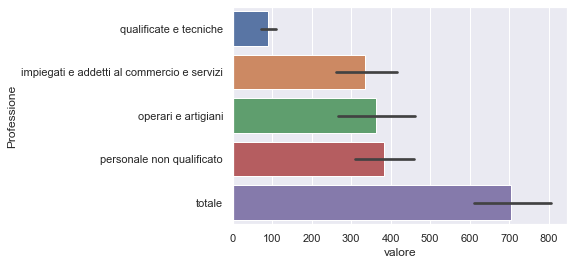

In [78]:
sns.barplot(data=tipo_occup, x='valore', y='Professione', orient='h')

Il fenomeno sociale porta quindi a delle conseguenze, sia positive che negative. Analizziamole.

+ **PUNTO 4: POSSIBILI ASPETTI NEGATIVI?**

La **DELINQUENZA** può essere considerata come uno dei principali aspetti negativi; questo avviene per il pensiero comune secondo cui gli stranieri, non trovando lavoro, sono costretti a delinquere per sopravvivere. (Ma non è così). Prendo in considerazione gli stranieri che hanno commesso delitti e/o delinquenze sul territorio italiano.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [83]:
delinquenza = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/delinquenza.csv", usecols=['TIPO_DATO35', 'Tipo di delitto', 'Cittadinanza', 'Seleziona periodo', 'Value'])
delinquenza.isnull().any() #non ci sono valori nulli

TIPO_DATO35          False
Tipo di delitto      False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Rinomino per semplicità le colonne e seleziono le righe contenenti i dati delle persone che hanno commesso violenze, delitti o delinquenze.

In [84]:
delinquenza = delinquenza.rename(columns={'TIPO_DATO35' : 'posizione_sogg', 'Tipo di delitto': 'tipo_delitto', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
delinquenza = delinquenza.loc[delinquenza['posizione_sogg'] == 'OFFEND']
delinquenza 

,posizione_sogg,tipo_delitto,Cittadinanza,periodo,valore
0,OFFEND,strage,straniero-a,2018,2
1,OFFEND,strage,straniero-a,2018,0
2,OFFEND,omicidi volontari consumati,straniero-a,2018,46
4,OFFEND,omicidi volontari consumati,straniero-a,2018,4
6,OFFEND,omicidi volontari consumati a scopo di furto o...,straniero-a,2018,4
...,...,...,...,...,...
1348,OFFEND,contrabbando,straniero-a,2018,3
1349,OFFEND,altri delitti,straniero-a,2018,3476
1350,OFFEND,altri delitti,straniero-a,2018,1460
1351,OFFEND,totale,straniero-a,2018,7372


Che tipologie di azioni commettono?

In [86]:
delinquenza1 = delinquenza.pivot_table(values='valore', index='posizione_sogg', columns='tipo_delitto')
delinquenza1

tipo_delitto,altri delitti,associazione di tipo mafioso,associazione per delinquere,attentati,atti sessuali con minorenne,contrabbando,contraffazione di marchi e prodotti industriali,corruzione di minorenne,danneggiamenti,danneggiamento seguito da incendio,...,sequestri di persona,sfruttamento e favoreggiamento della prostituzione,stalking,strage,tentati omicidi,totale,truffe e frodi informatiche,usura,violazione della proprietà intellettuale,violenze sessuali
posizione_sogg,,,,,,,,,,,,,,,,,,,,,
OFFEND,6914.1875,8.375,122.625,3.0,9.6875,4.4375,230.0625,1.6875,481.625,17.875,...,38.875,88.25,144.625,0.4375,37.6875,17438.625,624.6875,4.4375,12.1875,125.5625


#### Gli illeciti compiuti dagli stranieri in Italia sono di vario tipo, vanno dall'associazione per deliquere allo stalking. Uno dei dati maggiori e più rilevanti è a proposito delle truffe e frodi informatiche.

Sono in numero significativo?

In [22]:
delinquenza['valore'].count()

896

#### Tuttavia, il numero di illeciti compiuti nell'anno analizzato (è proposto il 2018) sono minori di 1000, sono un numero non statisticamente significativo a mio parere.

+ **PUNTO 5: POSSIBILI ASPETTI POSITIVI?**

L'**ALTA FECONDITA'** è uno dei possibili e condivisi aspetti positivi che l'immigrazione in Italia consente. Analizziamo i tassi totali di fecondità delle donne straniere.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [88]:
fecondita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/fecondita.csv", usecols=['Territorio', 'Tipo dato', 'Cittadinanza', 'Seleziona periodo', 'Value'])
fecondita.isnull().any() #non ci sono valori nulli

Territorio           False
Tipo dato            False
Cittadinanza         False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo le variabili e selezioniamo il tasso di fecondita totale, escludendo casistiche più specifiche per comodità e maggiore chiarezza.

In [89]:
fecondita = fecondita.rename(columns={'Tipo dato' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
fecondita = fecondita.loc[fecondita['tipo_dato']== 'tasso di fecondità totale']
fecondita 

,Territorio,tipo_dato,Cittadinanza,periodo,valore
0,Italia,tasso di fecondità totale,straniero-a,2018,1.94
2,Nord-ovest,tasso di fecondità totale,straniero-a,2018,2.03
4,Piemonte,tasso di fecondità totale,straniero-a,2018,1.94
6,Torino,tasso di fecondità totale,straniero-a,2018,1.84
8,Vercelli,tasso di fecondità totale,straniero-a,2018,2.11
...,...,...,...,...,...
254,Cagliari,tasso di fecondità totale,straniero-a,2018,1.44
256,Oristano,tasso di fecondità totale,straniero-a,2018,1.43
258,Monza e della Brianza,tasso di fecondità totale,straniero-a,2018,2.21
260,Fermo,tasso di fecondità totale,straniero-a,2018,1.89


Visualizziamo in modo più chiaro per ogni città qual è il tasso di fecondità delle donne straniere (in media).

In [90]:
fecondita.pivot_table(values='valore', index='tipo_dato', columns='Territorio')

Territorio,Abruzzo,Agrigento,Alessandria,Ancona,Arezzo,Ascoli Piceno,Asti,Avellino,Bari,Barletta-Andria-Trani,...,Valle d'Aosta / Vallée d'Aoste,Varese,Veneto,Venezia,Verbano-Cusio-Ossola,Vercelli,Verona,Vibo Valentia,Vicenza,Viterbo
tipo_dato,,,,,,,,,,,,,,,,,,,,,
tasso di fecondità totale,1.72,2.22,1.89,1.85,1.8,1.89,1.83,1.57,1.98,1.99,...,2.34,1.97,2.07,1.97,1.83,2.11,2.17,1.6,2.16,1.81


Interessante è calcolare il tasso di fecondità in media tra tutte le città.

In [91]:
np.mean(fecondita['valore'])

1.9247727272727273

#### Il tasso di fecondità medio delle donne straniere in Italia è pari a 1.93 figli per donna quidni quasi due figli per donna. Citando sempre l'ISTAT il tasso di fecondità italiano invece ammonta a 1.29 figli per donna, uno dei valori più bassi di tutta Europa. Come sappiamo, il problema dell'invecchiamento demografico riguarda soprattutto anche l'Italia e l'inalzamento di questo tasso potrebbe contrastare questo fenomeno.

+ **PUNTO 6: IN CHE CONDIZIONI VIVONO I MIGRANTI IN ITALIA?**

1) Si parla spesso di **DISCRIMINAZIONI** dei quali i soggetti oggetto di questa analisi sono spesso succubi. Analizziamo le tipologie di discriminazioni subite e in che contesto avvengono.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [103]:
discriminazioni = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/discriminazioni.csv", usecols=['Cittadinanza', 'Discriminazione', 'Value'])
discriminazioni.isnull().any() #non ci sono valori nulli

Cittadinanza       False
Discriminazione    False
Value              False
dtype: bool

Rinominanimo le variabili.

In [104]:
discriminazioni = discriminazioni.rename(columns={'Value' : 'valore'})
discriminazioni

,Cittadinanza,Discriminazione,valore
0,Albania,"sì, nel percorso di studi",7476.0
1,Albania,"sì, sul lavoro",28940.0
2,Albania,"sì, nella ricerca del lavoro",19327.0
3,Albania,"sì, in locali/uffici pubblici",8570.0
4,Unione europea (27 paesi),"sì, nel percorso di studi",15704.0
5,Unione europea (27 paesi),"sì, sul lavoro",148178.0
6,Unione europea (27 paesi),"sì, nella ricerca del lavoro",81709.0
7,Unione europea (27 paesi),"sì, in locali/uffici pubblici",66373.0
8,Extra Ue 27,"sì, nel percorso di studi",48303.0
9,Extra Ue 27,"sì, sul lavoro",268240.0


In [105]:
discriminazioni1 = discriminazioni.groupby('Cittadinanza')
discriminazioni1.sum()

,valore
Cittadinanza,
Albania,64347.0
Extra Ue 27,689181.3
Marocco,100362.4
Paesi esteri,1001145.1
Romania,238045.8
Unione europea (27 paesi),312010.4


Appare evidente dalla tabella precedente l'ingente numero di persone vittime di discriminazioni. Ma in che contesti avvengono?

In [106]:
discriminazioni2 = discriminazioni.groupby('Discriminazione')
discriminazioni2.sum()

,valore
Discriminazione,
"sì, in locali/uffici pubblici",594658.1
"sì, nel percorso di studi",154006.5
"sì, nella ricerca del lavoro",631805.4
"sì, sul lavoro",1024622.0


#### Le discriminazioni subite si riportano spesso sul posto di lavoro (1024622) e nella ricerca di quest'utltimo (631805.4). Non mancano discriminazioni a scuola, durante il percorso degli studi (154006.5) e nei locali e uffici pubblici (594658). Questi sono solo alcuni esempi seplificativi di situazioni che avvengono tutti i giorni vicino a noi.

Vediamo le tipologie di discriminazioni dove sono state incontrate graficamente.

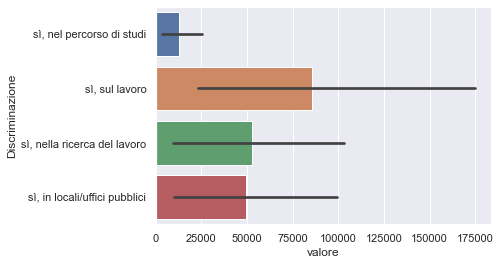

In [26]:
sns.barplot(data=discriminazioni, x='valore', y='Discriminazione', orient='h')

2) Molte persone venute in ricerca di felicità e stabilità si trovano però in condizioni di **POVERTA'**. Analizziamo il dataframe relativo alle famiglie in condizioni di povertà assoluta. Per povertà assoluta intendiamo quelle famiglie che stentano a sopravvivere ed a mantenere uno standard di vita minimamente accettabile.

**TRATTAMENTO DEI VALORI NULLI: CI SONO? COME LI GESTISCO?**

In [113]:
poverta = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/poverta.csv", usecols=['Territorio', 'TIPO_DATO8', 'Seleziona periodo', 'Value'])
poverta.isnull().any() #non ci sono valori nulli

Territorio           False
TIPO_DATO8           False
Seleziona periodo    False
Value                False
dtype: bool

Rinominiamo le variabili e selezioniamo le righe conteneti il dato di famiglie in povertà assoluta.

In [114]:
poverta = poverta.rename(columns={'TIPO_DATO8' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
poverta = poverta.loc[poverta['tipo_dato']== 'FAM_POVASS']
poverta

,Territorio,tipo_dato,periodo,valore
0,Italia,FAM_POVASS,2019,100.0
10,Nord,FAM_POVASS,2019,43.4
20,Nord-ovest,FAM_POVASS,2019,25.1
30,Nord-est,FAM_POVASS,2019,18.3
40,Centro,FAM_POVASS,2019,14.4
50,Mezzogiorno,FAM_POVASS,2019,42.2
60,Sud,FAM_POVASS,2019,28.1
70,Isole,FAM_POVASS,2019,14.1


Mediamente qual è il tasso di povertà assoluta familiare?

In [115]:
np.mean(poverta['valore'])

35.70000000000001

#### Il tasso di povertà assoluta familiare, nelle famiglie con persone straniere, è pari al 35.7%, ossia circa 4 persone su 10. Il numero non è molto alto ma è comunque significativo e questi soggetti, i più fragili, andrebbero più tutelati dallo Stato.

+ **CONCLUSIONI FINALI**
* * *

Come ho spiegato inizialmente l'obbiettivo della analisi è evidenziare la presenza della migrazione nel nostro Paese mettendo in luce i *numeri*, i *motivi* e le *conseguenze* che possono derivarne.

Ogni anno si contano più o meno di **5 milioni** di migranti provenienti da tutto il mondo, un trend in aumento ma perlopiù stabile tra un anno e l'altro. I **motivi** per i quali questi soggetti migrano sono di tipo familiare, lavorativo o per richiedere asilo e protezione umanitaria. I migranti sono parte integrante della forza lavoro italiana: parliamo di più del **60% occupato**, non contando l'ingente numero di persone impiegate nell'economia sommersa. Pochi invece sono i disoccupati, pari al 10-15% del totale. Essi svolgono, proprio come è comunemente condiviso, quei lavori che gli italiani spesso *non sarebbero disposti a svolgere*; è un meccanismo che non ha a che fare con nessuna "classificazione" lavorativa, piuttosto ha a che vedere con la teoria del capitale umano, secondo cui un soggetto che ha investito in istruzione si aspetta un ritorno di quest'ultimo in termini lavorativi. Sono occupati quindi in lavori non qualificati, fanno parte della classe operaia o dell'artigianato e molto poco spesso in attività prestigiose e qualificate. Come tutte le cose, anche la migrazione porta con sé pro e contro: tra i contro troviamo la **delinquenza**, che secondo alcuni potrebbero esercitare, ma che molti dati smentiscono (o perlomeno non sono così rilevanti statisticamente); tra i pro troviamo **l'alta fecondità**, pari a quasi 2 figli per donna, che contrasterebbe l'invecchiamento della popolazione italiana. Riguardo la loro inclusione nel Paese che li ospita, molte sono le perplessità in questo campo. Sono spesso vittime di **discriminazioni** nel mondo del lavoro e non solo, anche a scuola e nei luoghi pubblici. Inoltre, una parte di loro si trova in **gravi condizioni economiche**. 

L'inclusione e l'integrazione sono tempi importanti e sempre più attuali, sta ad ognuno di noi vedere questo fenomeno come qualcosa che non può essere fermato o contrastato, bensì sfruttato al meglio e interpretato come un continuo arricchimento.